In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aug_train.csv')
var_df = pd.read_csv('var_df.csv')

## 1 ) 개별 변수들 시각화

### 1-1) 연속형 변수

/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

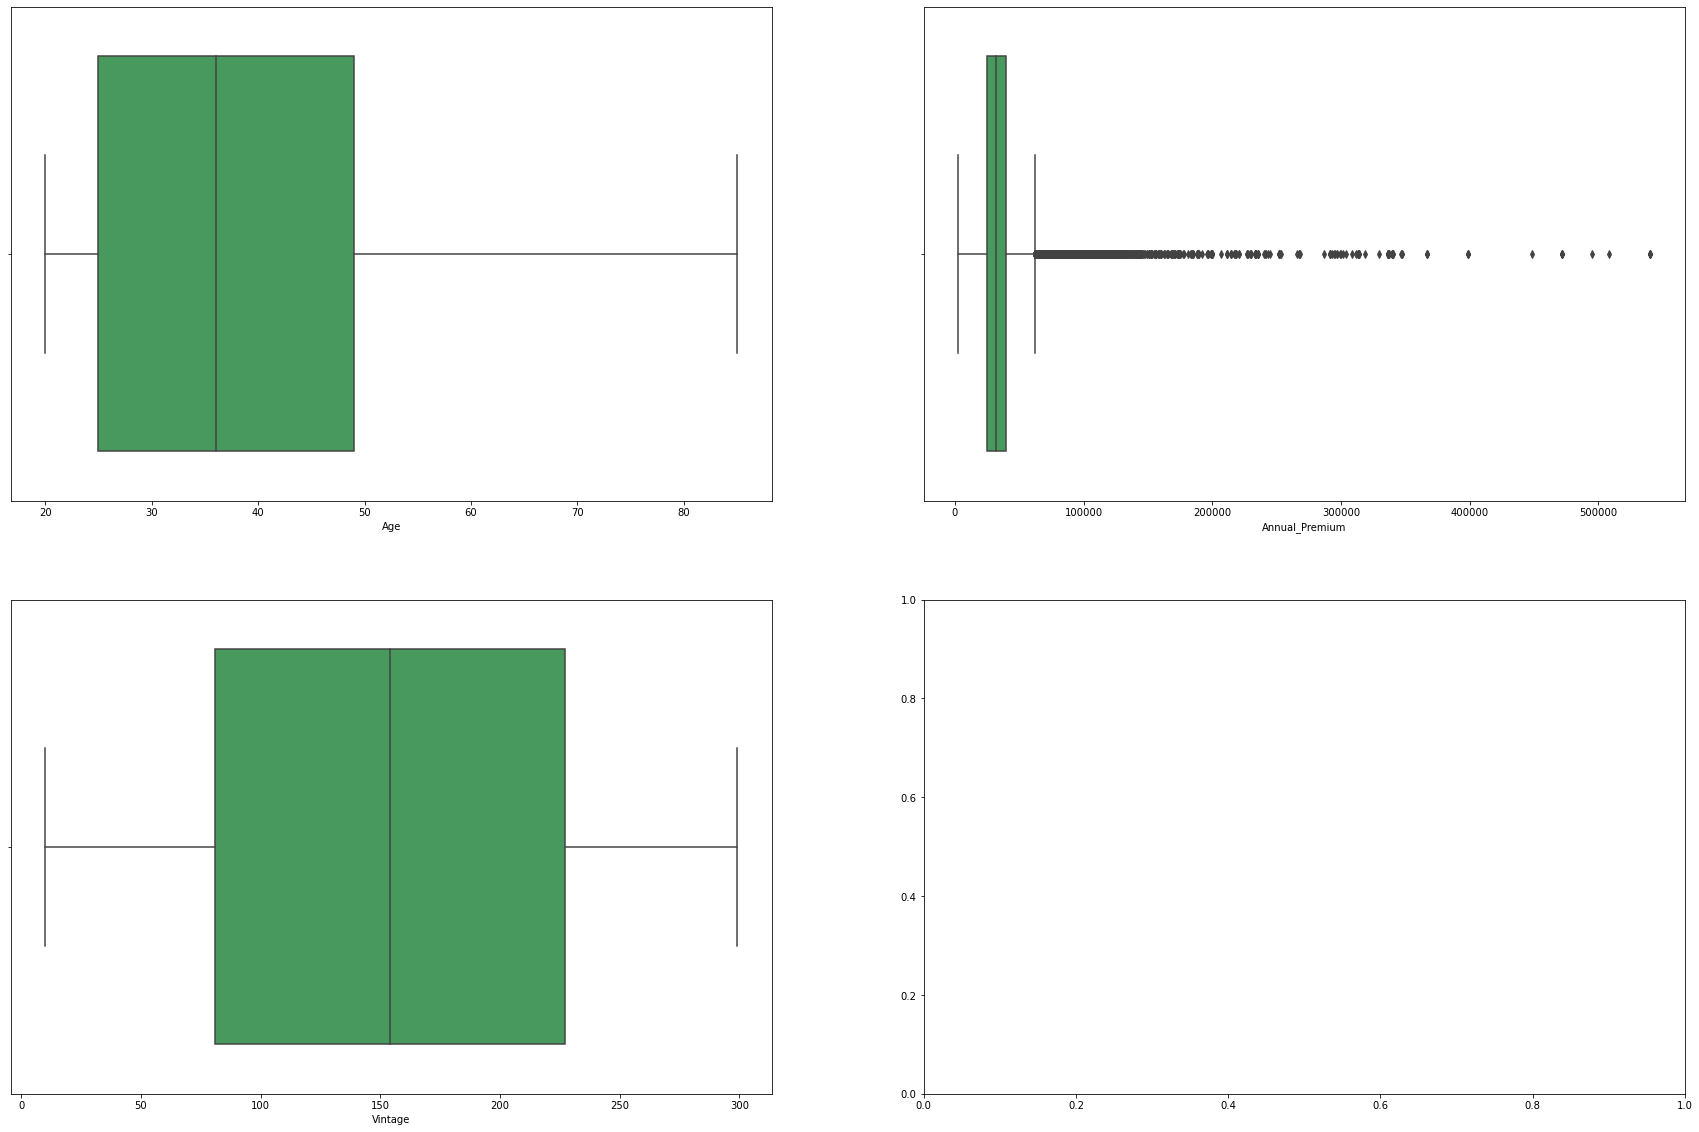

In [4]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,20))
sns.set_palette('RdYlGn_r')

plt.subplot(2,2,1)
sns.boxplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Annual_Premium'])

plt.subplot(2,2,3)
sns.boxplot(df['Vintage'])


plt.show()

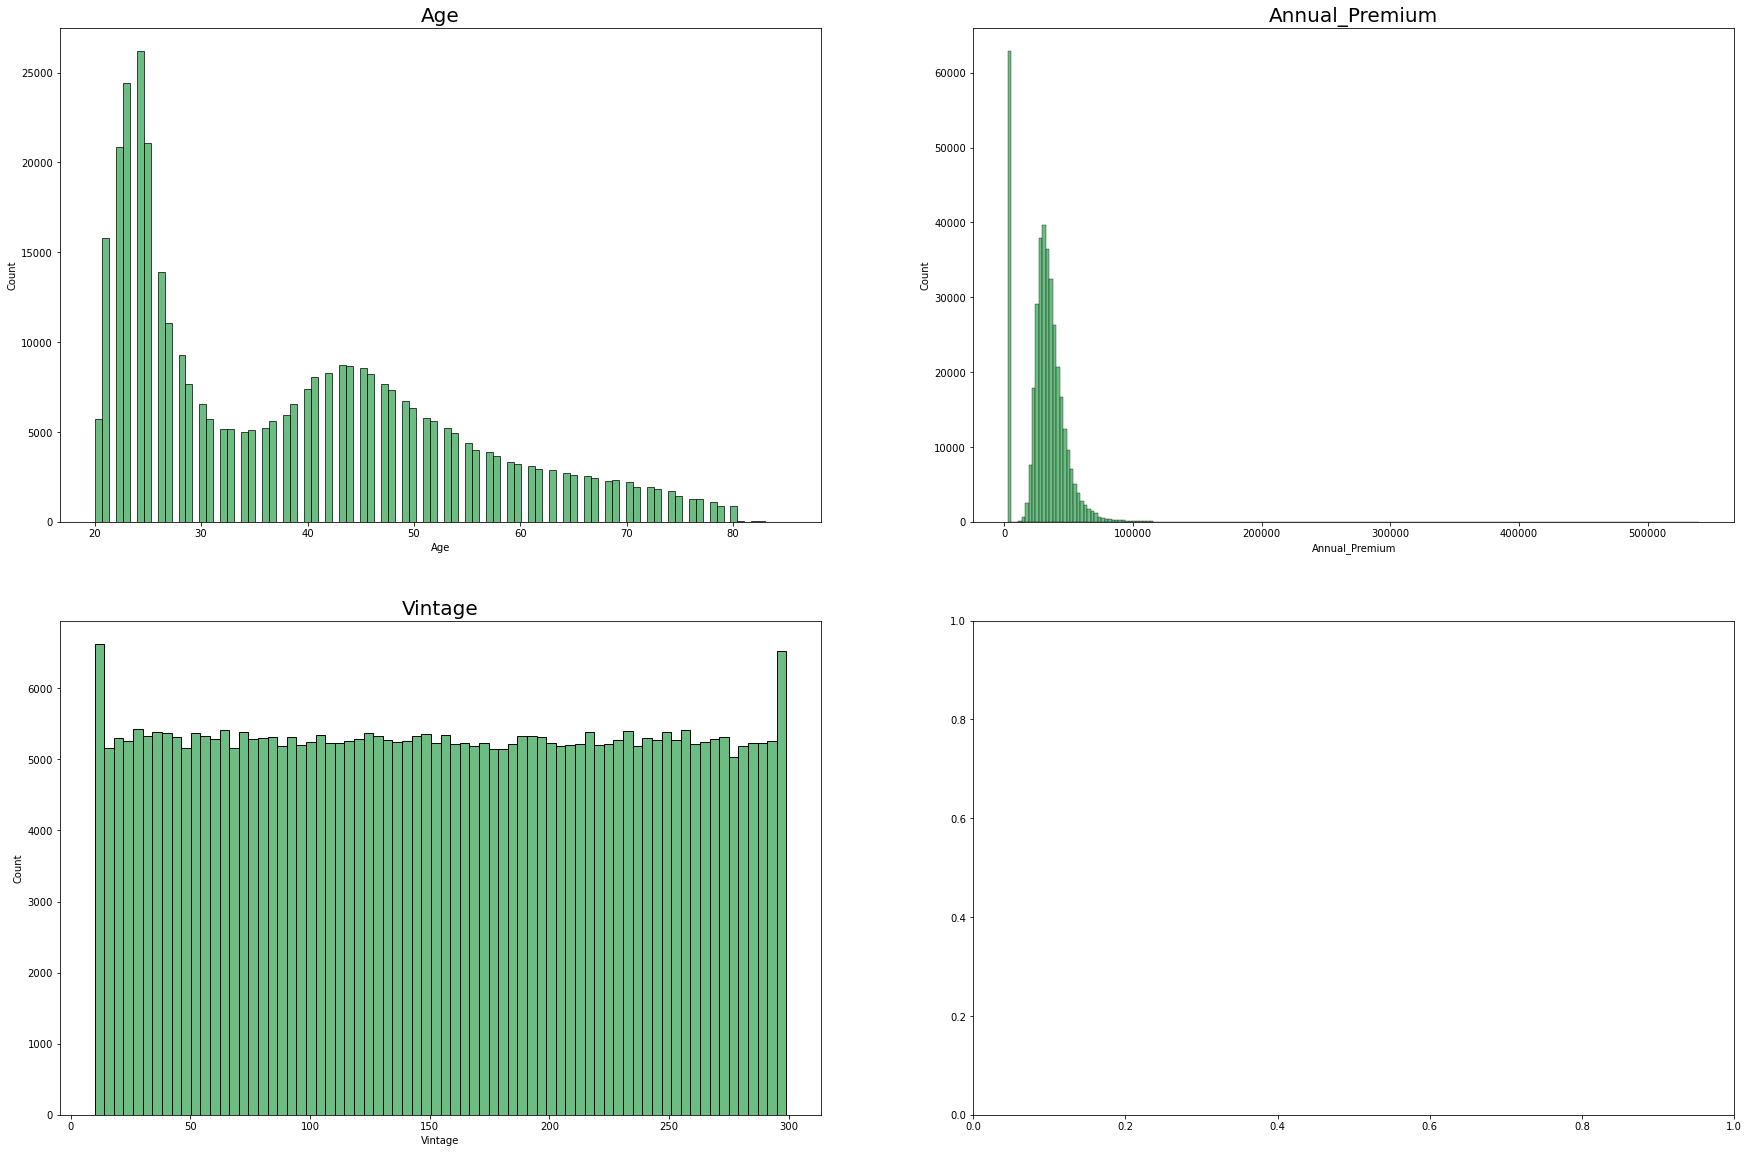

In [3]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,20))
sns.set_palette('RdYlGn_r')

plt.subplot(2,2,1)
sns.histplot(df['Age'])
plt.title('Age', fontsize=20)

plt.subplot(2,2,2)
sns.histplot(df['Annual_Premium'],bins = 200)
plt.title('Annual_Premium', fontsize=20)

plt.subplot(2,2,3)
sns.histplot(df['Vintage'])
plt.title('Vintage', fontsize=20)

plt.show()

### 1-2) 범주형 변수

/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

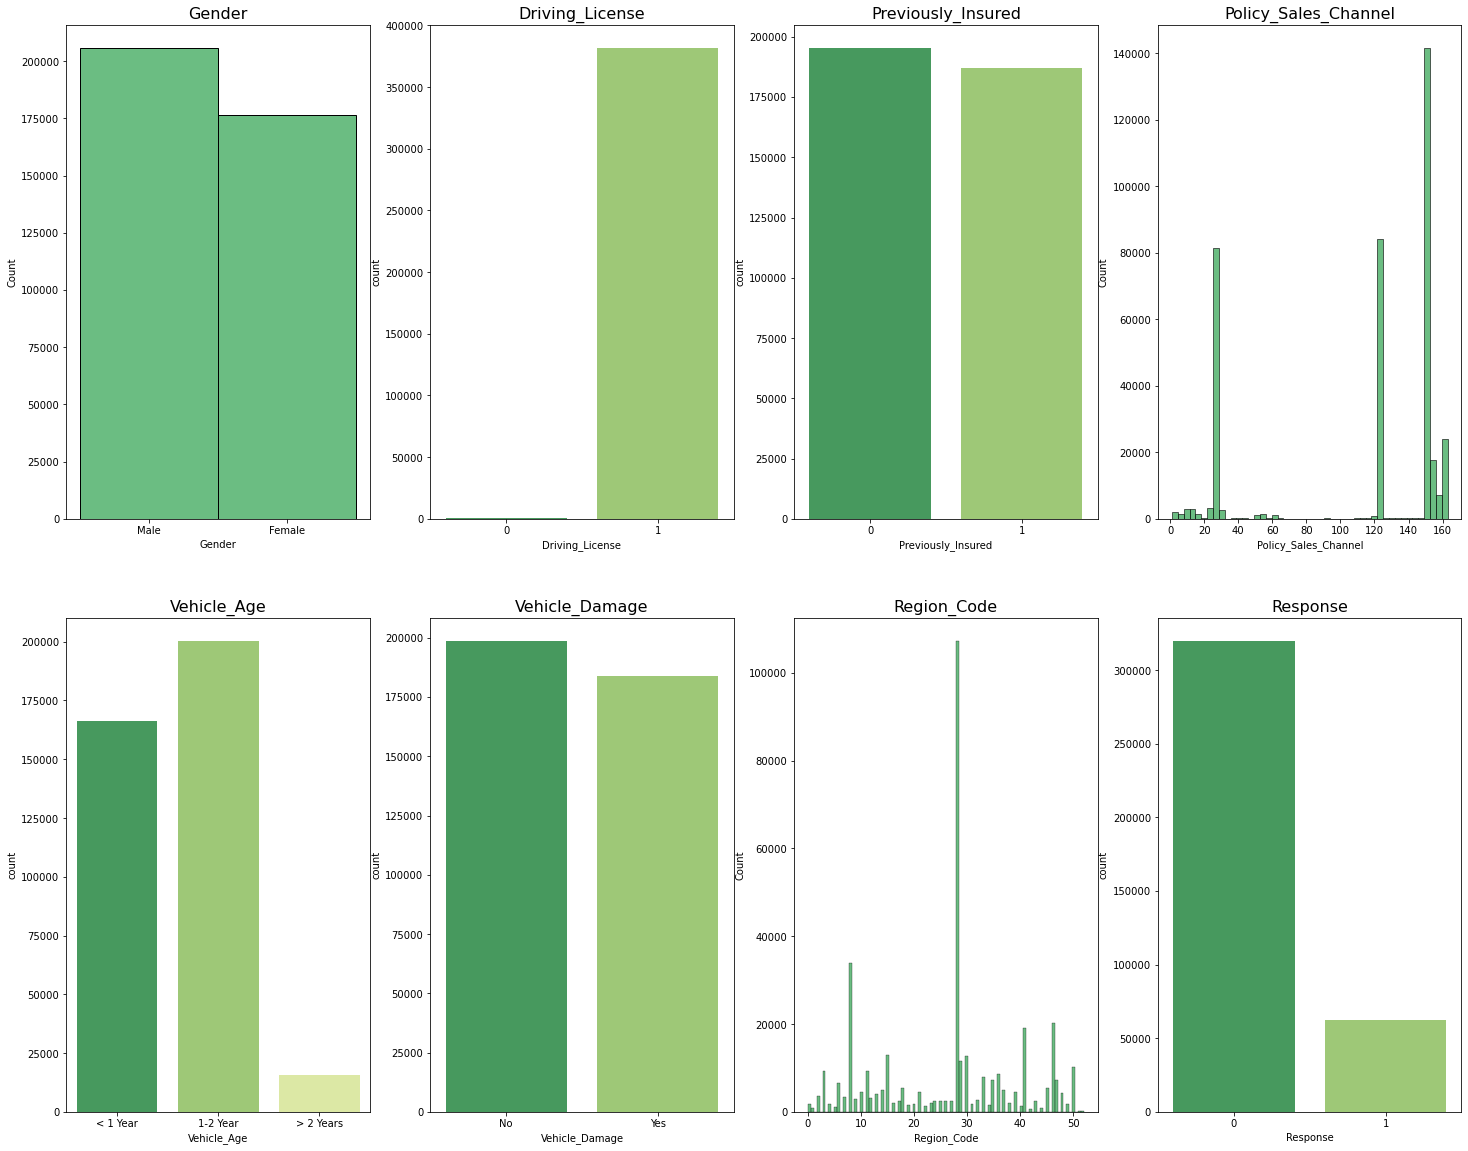

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,20))
sns.set_palette('RdYlGn_r')

plt.subplot(2,4,1)
sns.histplot(df['Gender'])
plt.title('Gender', fontsize=16)

plt.subplot(2,4,2)
sns.countplot(df['Driving_License'])
plt.title('Driving_License', fontsize=16)

plt.subplot(2,4,3)
sns.countplot(df['Previously_Insured'])
plt.title('Previously_Insured', fontsize=16)

plt.subplot(2,4,4)
sns.histplot(df['Policy_Sales_Channel'])
plt.title('Policy_Sales_Channel', fontsize=16)

plt.subplot(2,4,5)
sns.countplot(df['Vehicle_Age'])
plt.title('Vehicle_Age', fontsize=16)

plt.subplot(2,4,6)
sns.countplot(df['Vehicle_Damage'])
plt.title('Vehicle_Damage', fontsize=16)

plt.subplot(2,4,7)
sns.histplot(df['Region_Code'])
plt.title('Region_Code', fontsize=16)

plt.subplot(2,4,8)
sns.countplot(df['Response'])
plt.title('Response', fontsize=16)

plt.show()

## 2 ) 독립변수 간 시각화

### 2-1) 독립변수 간 상관관계

<AxesSubplot:>

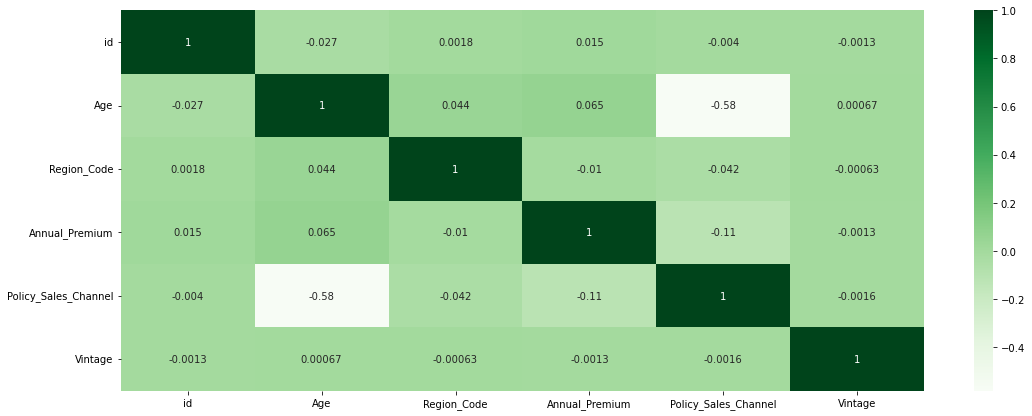

In [7]:
ndf=df.loc[:,['id','Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]
plt.figure(figsize = (18, 7))
sns.heatmap(ndf.corr(), cmap = 'Greens', annot = True)

### 2-2) 독립변수 간 관계

#### Vehicle Age - Vehicle Damage

/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

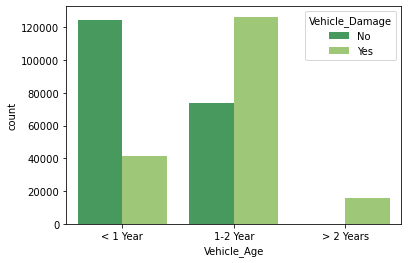

In [6]:
sns.set_palette('RdYlGn_r')
sns.countplot(df['Vehicle_Age'], hue = df['Vehicle_Damage'])

#### Previously Insured - Vehicle Damage

/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

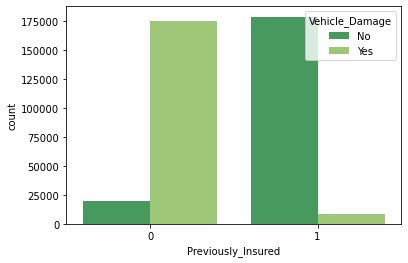

In [7]:
sns.set_palette('RdYlGn_r')
sns.countplot(df['Previously_Insured'], hue = df['Vehicle_Damage'])

### 2-3) 독립변수와 종속변수 간의 관계

#### Vehicle Age - Response

<AxesSubplot:xlabel='Vehicle_Age'>

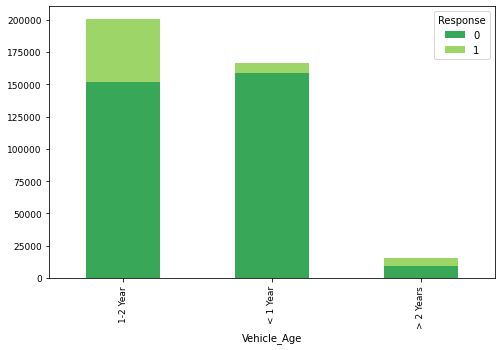

In [11]:
gb = df.groupby(['Vehicle_Age', 'Response']).size().unstack()
gb
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

#### Previously Insured - Response

<AxesSubplot:xlabel='Previously_Insured'>

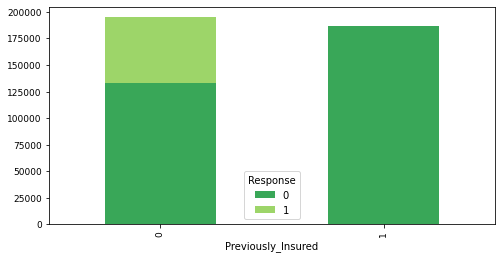

In [9]:
gb = df.groupby(['Previously_Insured', 'Response']).size().unstack()
gb
gb.plot(kind='bar', stacked=True, figsize = [8,4], fontsize = 9)

<AxesSubplot:xlabel='Age', ylabel='Count'>

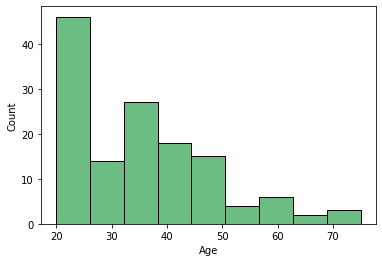

In [13]:
sns.histplot(df[(df['Previously_Insured'] == 1) & (df['Response'] == 1)]['Age'])

## 3 ) 변수 추가의 기반이 되었던 그래프

### 1. Population

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

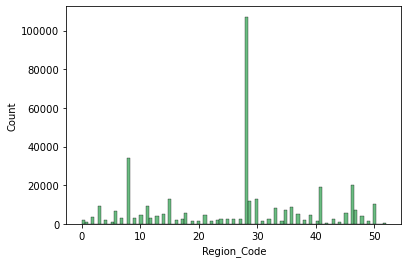

In [16]:
sns.histplot(df['Region_Code'])

### 2. Basic_Annual

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

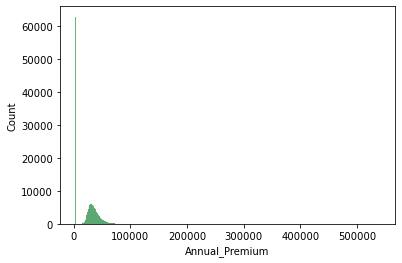

In [17]:
sns.histplot(df['Annual_Premium'])

### 3. Beneficiary , 5. N_Danger

/Users/ljhee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

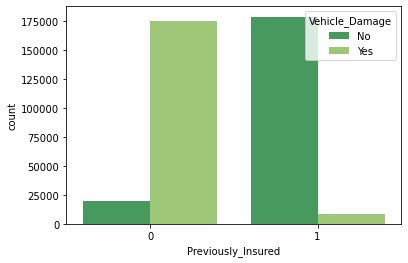

In [12]:
sns.set_palette('RdYlGn_r')
sns.countplot(df['Previously_Insured'], hue = df['Vehicle_Damage'])

### 4. Danger

<AxesSubplot:xlabel='Vehicle_Age'>

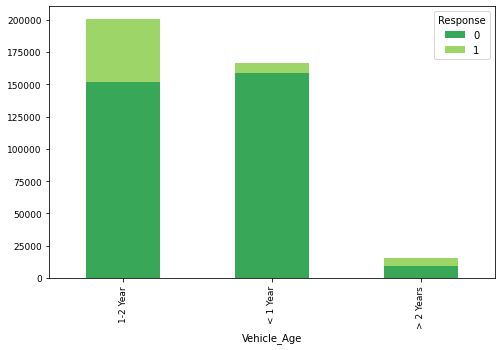

In [13]:
gb = df.groupby(['Vehicle_Age', 'Response']).size().unstack()
gb
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

### 6. Age_Damaged

<AxesSubplot:xlabel='Age_group'>

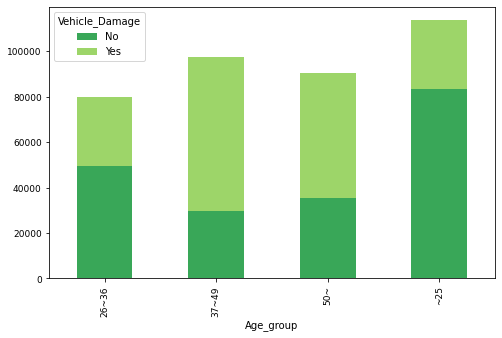

In [14]:
gb = var_df.groupby(['Age_group', 'Vehicle_Damage']).size().unstack()
gb
gb.plot(kind='bar', stacked=True, figsize = [8,5], fontsize = 9)

### 7. Main_Channel

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

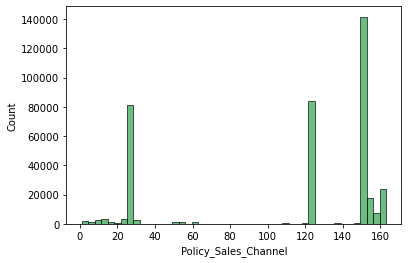

In [25]:
sns.histplot(df['Policy_Sales_Channel'])

### 8. Age_ChanneL

In [10]:
df_y = df[df['Age']<36]
df_o = df[df['Age']>=37]

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

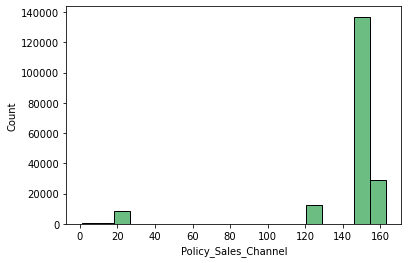

In [14]:
#36세 이하 고객의 주요 채널
sns.histplot(df_y.Policy_Sales_Channel)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

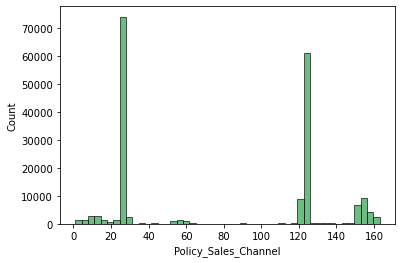

In [15]:
#36세 초과 고객의 주요 채널
sns.histplot(df_o.Policy_Sales_Channel)

### 9. Age_group

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

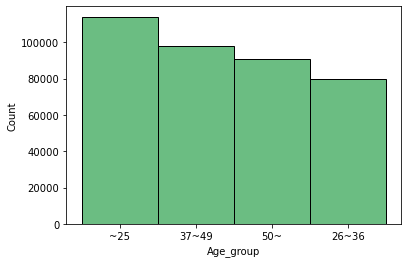

In [33]:
sns.histplot(var_df['Age_group'])

### 10. Young_Rich

<AxesSubplot:xlabel='Previously_Insured'>

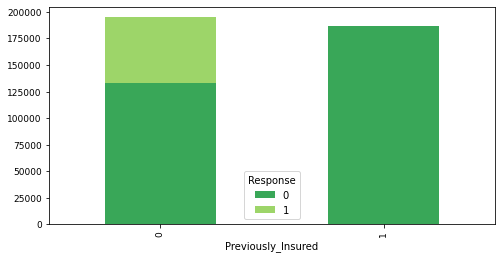

In [15]:
gb = df.groupby(['Previously_Insured', 'Response']).size().unstack()
gb
gb.plot(kind='bar', stacked=True, figsize = [8,4], fontsize = 9)